In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [111]:
file_path="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data_header=["age","workclass","flnweight","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
dataset=pd.read_csv(file_path, names=data_header)
dataset.head()

,age,workclass,flnweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
#Find the count of missing values
dataset.isnull().sum()

age               0
workclass         0
flnweight         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [113]:
dataset['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [114]:
dataset['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [115]:
#Label encode the categorical variables
encoded_features=['workclass','marital-status','race','sex','income']
le = LabelEncoder()
for i in encoded_features:
    dataset[i+"_encoded"] = le.fit_transform(dataset[i])

In [116]:
#Scatter plot to find relationship between variables
#scatter_matrix(dataset,figsize=(12, 12))
#pyplot.show()

In [117]:
dataset.columns

Index(['age', 'workclass', 'flnweight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'workclass_encoded', 'marital-status_encoded', 'race_encoded',
       'sex_encoded', 'income_encoded'],
      dtype='object')

In [118]:
input_features = ['age','workclass_encoded','education-num','marital-status_encoded','race_encoded','sex_encoded']
output='income_encoded'
X=dataset[input_features]
y=dataset[output]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
print("Trainig and test data created")

Trainig and test data created


In [119]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_results)

[ 0.78741366  0.78818112  0.8046815   0.80046048  0.79262673  0.78264209
  0.79070661  0.7937788   0.78955453  0.80145929]


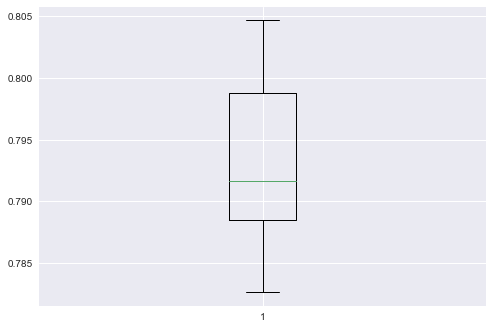

In [120]:
#Compare the results values
pyplot.boxplot(cv_results)
pyplot.show()

In [121]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print("Accuracy Score",accuracy_score(Y_validation, predictions))
cm=confusion_matrix(Y_validation, predictions)
print(cm)

Accuracy Score 0.803009365884
[[4449  577]
 [ 706  781]]


In [131]:
#Get the optimum random state for Random Forest
for i in range(1 , 10):
    model_RF=RandomForestClassifier(n_estimators=10, random_state=i)
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model_RF, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(i," - : ",cv_results.mean())

1  - :  0.803247792817
2  - :  0.804745076056
3  - :  0.805090698176
4  - :  0.803746906878
5  - :  0.804054038123
6  - :  0.804860961293
7  - :  0.803746730044
8  - :  0.802787258047
9  - :  0.801866306397


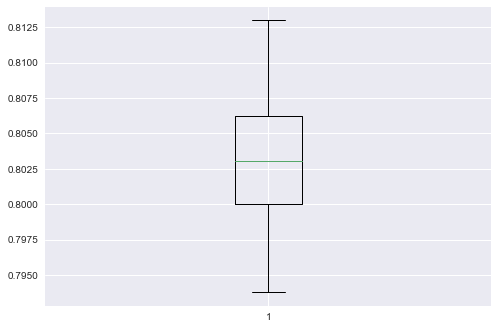

In [123]:
pyplot.boxplot(cv_results)
pyplot.show()

In [132]:
model_RF=RandomForestClassifier(n_estimators=10, random_state=5)
model_RF.fit(X_train, Y_train)
predictions = model_RF.predict(X_validation)
# Evaluate predictions
print("Accuracy Score",accuracy_score(Y_validation, predictions))
cm=confusion_matrix(Y_validation, predictions)
print(cm)

Accuracy Score 0.806847842776
[[4441  585]
 [ 673  814]]
